In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ampligraph.datasets import load_fb15k_237
from ampligraph.latent_features import TransE
from ampligraph.evaluation import evaluate_performance, mrr_score, hits_at_n_score
import random as rn
import tensorflow as tf
from sklearn.decomposition import PCA

np.random.seed(123)
rn.seed(123)
tf.set_random_seed(123)

/opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages

In [2]:
X = np.array([['George','worksFor','Acme Inc'],
              ['George','isA','Person'],
              ['Mike','worksFor','Acme Inc'],
              ['Mike','friendWith','George'],
              ['George','isA','Person'],
              ['George','worksFor','Acme Inc'],
              ['Mike','isA','Person'],
              ['Mike','bornIn','Liverpool'],
              ['Mike','likes','Liverpool FC'],
              ['Liverpool FC','basedIn','Liverpool'],
              ['Liverpool FC','isA','FootballTeam'],
              ['Liverpool','isA','City']])

In [3]:
all_relations = list(set(X[:,1]))
all_entities = list(set(np.concatenate((X[:,0], X[:,2]), axis=0)))

In [4]:
model = TransE(batches_count=1, seed=555, epochs=100, k=10, loss='pairwise',
               loss_params={'margin':1})

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


In [5]:
model.fit(X)

WARNING - From /opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
WARNING - From /opt/anaconda3/envs/ampligraph/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:429: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    
WARNING - From /opt/anaconda3/envs/am

In [6]:
#embeddings=model.get_embeddings(['a','b','c','d','e','f'], embedding_type='entity')
#model.predict(np.array(['Acme Inc', 'basedIn', 'Liverpool']))
#model.get_embeddings(['y'], embedding_type='relation')

for rel in all_relations:
    
    print(rel, model.predict(np.array(['Acme Inc', rel, 'Liverpool'])))

worksFor [-4.1680703]
basedIn [-3.7818234]
friendWith [-3.7990832]
isA [-4.185338]
bornIn [-5.7568564]
likes [-5.173348]


In [7]:
entity_embeddings=model.get_embeddings(['Acme Inc', 'Liverpool'], embedding_type='entity')
relation_embeddings=model.get_embeddings(['basedIn'], embedding_type='relation')

In [8]:
all_entity_embeddings = []

for i in all_entities:
    
    all_entity_embeddings.append(model.get_embeddings([i],embedding_type='entity'))
    
all_entity_embeddings = np.array(all_entity_embeddings).squeeze()

In [9]:
embeddings_2d = PCA(n_components=2, random_state=333).fit_transform(all_entity_embeddings)

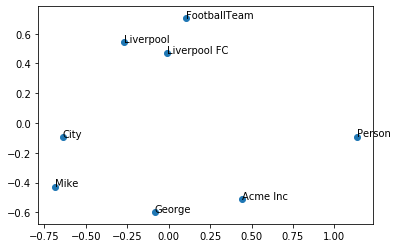

In [10]:
fig, ax = plt.subplots()
ax.scatter(embeddings_2d[:,0], embeddings_2d[:,1])
for i, txt in enumerate(all_entities):
    ax.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

In [27]:
#Acme Inc basedIn Liverpool because:
true_explanation = X[[2, 5, 3, 7,8,9]]
true_explanation

array([['Mike', 'worksFor', 'Acme Inc'],
       ['George', 'worksFor', 'Acme Inc'],
       ['Mike', 'friendWith', 'George'],
       ['Mike', 'bornIn', 'Liverpool'],
       ['Mike', 'likes', 'Liverpool FC'],
       ['Liverpool FC', 'basedIn', 'Liverpool']], dtype='<U12')